# Import Libraries & Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ML PROJECTS/Crime_Data_from_2020_to_Present.csv')

# **Understand dataset**

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


**LAPD Crime Dataset – Columns Summary**

* DR_NO – Unique case file number.
* Date Rptd – Date crime was reported.
* DATE OCC – Date crime occurred.
* TIME OCC – Time of occurrence (24-hour format).
* AREA – Numeric code for police area (1–21).
* AREA NAME – Name of the police area/division.
* Rpt Dist No – Reporting district code.
* Part 1-2 – Crime classification (Part I or II).
* Crm Cd – Primary crime code.
* Crm Cd Desc – Description of the primary crime.
* Mocodes – Modus Operandi codes (suspect’s behavior).
* Vict Age – Victim’s age.
* Vict Sex – Victim’s gender (M/F/X).
* Vict Descent – Victim’s ethnicity code.
* Premis Cd – Code for location type of crime.
* Premis Desc – Description of the premise.
* Weapon Used Cd – Weapon type code.
* Weapon Desc – Description of weapon used.
* Status – Case status (e.g., IC = Incomplete).
* Status Desc – Description of the case status.
* Crm Cd 1 – Most serious crime code.
* Crm Cd 2 – Second crime code (if any).
* Crm Cd 3 – Third crime code (if any).
* Crm Cd 4 – Fourth crime code (if any).
* LOCATION – Rounded block address of incident.
* Cross Street – Nearest cross street.
* LAT – Latitude of crime location.
* LON – Longitude of crime location.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005198 entries, 0 to 1005197
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005198 non-null  int64  
 1   Date Rptd       1005198 non-null  object 
 2   DATE OCC        1005198 non-null  object 
 3   TIME OCC        1005198 non-null  int64  
 4   AREA            1005198 non-null  int64  
 5   AREA NAME       1005198 non-null  object 
 6   Rpt Dist No     1005198 non-null  int64  
 7   Part 1-2        1005198 non-null  int64  
 8   Crm Cd          1005198 non-null  int64  
 9   Crm Cd Desc     1005198 non-null  object 
 10  Mocodes         853438 non-null   object 
 11  Vict Age        1005198 non-null  int64  
 12  Vict Sex        860416 non-null   object 
 13  Vict Descent    860404 non-null   object 
 14  Premis Cd       1005182 non-null  float64
 15  Premis Desc     1004610 non-null  object 
 16  Weapon Used Cd  327280 non-null   fl

In [ ]:
rows, cols= df.shape
print(f"The no. of rows: {rows}")
print(f"The no. of cols: {cols}")

The no. of rows: 1005198
The no. of cols: 28


In [ ]:
df.isnull().sum().T

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


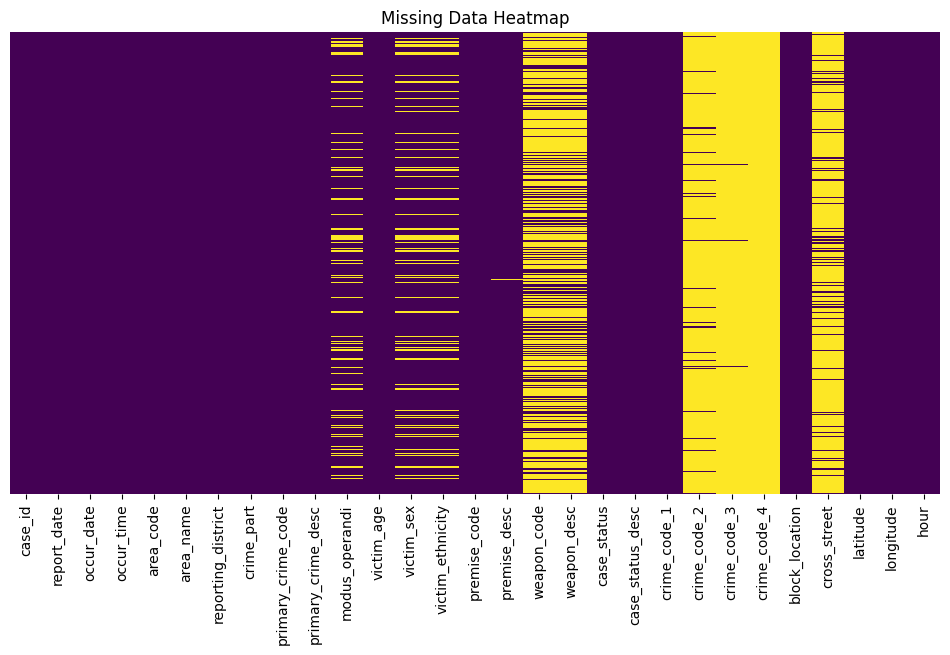

In [ ]:
# Missing data heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:
# Number of duplicate rows
print(df.duplicated().sum())

0


In [ ]:
# Rename columns for better understanding
df.rename(columns={
    'DR_NO': 'case_id',
    'Date Rptd': 'report_date',
    'DATE OCC': 'occur_date',
    'TIME OCC': 'occur_time',
    'AREA': 'area_code',
    'AREA NAME': 'area_name',
    'Rpt Dist No': 'reporting_district',
    'Part 1-2': 'crime_part',
    'Crm Cd': 'primary_crime_code',
    'Crm Cd Desc': 'primary_crime_desc',
    'Mocodes': 'modus_operandi',
    'Vict Age': 'victim_age',
    'Vict Sex': 'victim_sex',
    'Vict Descent': 'victim_ethnicity',
    'Premis Cd': 'premise_code',
    'Premis Desc': 'premise_desc',
    'Weapon Used Cd': 'weapon_code',
    'Weapon Desc': 'weapon_desc',
    'Status': 'case_status',
    'Status Desc': 'case_status_desc',
    'Crm Cd 1': 'crime_code_1',
    'Crm Cd 2': 'crime_code_2',
    'Crm Cd 3': 'crime_code_3',
    'Crm Cd 4': 'crime_code_4',
    'LOCATION': 'block_location',
    'Cross Street': 'cross_street',
    'LAT': 'latitude',
    'LON': 'longitude'
}, inplace=True)


In [ ]:
# Convert dates
df['report_date'] = pd.to_datetime(df['report_date'], errors='coerce')
df['occur_date'] = pd.to_datetime(df['occur_date'], errors='coerce')

# **Exploratory Data Analysis**

<ipython-input-20-2831fce63d0f>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crimes= df.resample('M', on='occur_date').size()


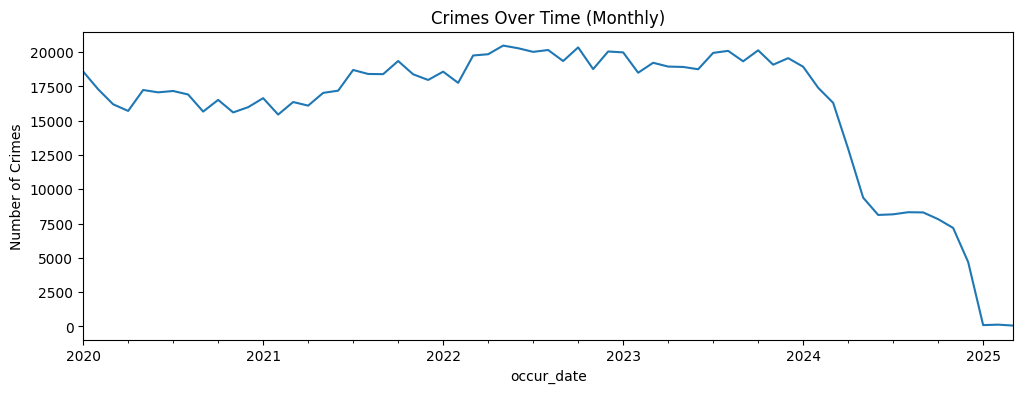

In [ ]:
# Crimes over time (monthly)
monthly_crimes= df.resample('M', on='occur_date').size()
monthly_crimes.plot(title="Crimes Over Time (Monthly)", figsize=(12, 4))
plt.ylabel("Number of Crimes")
plt.show()



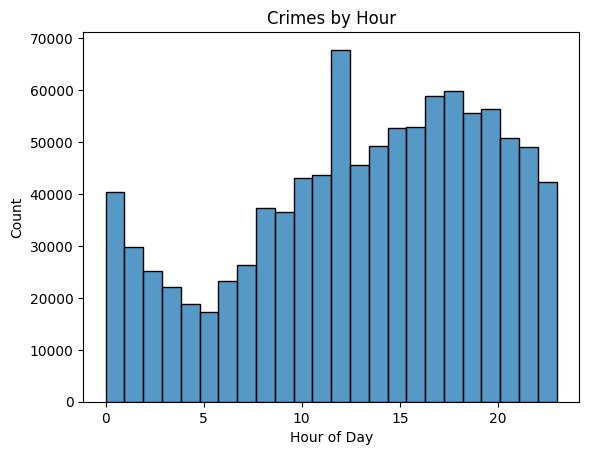

In [ ]:
# Crimes by hour
df['hour']= df['occur_time'].astype(str).str.zfill(4).str[:2].astype(int)
sns.histplot(df['hour'], bins=24, kde=False)
plt.title("Crimes by Hour")
plt.xlabel("Hour of Day")
plt.show()


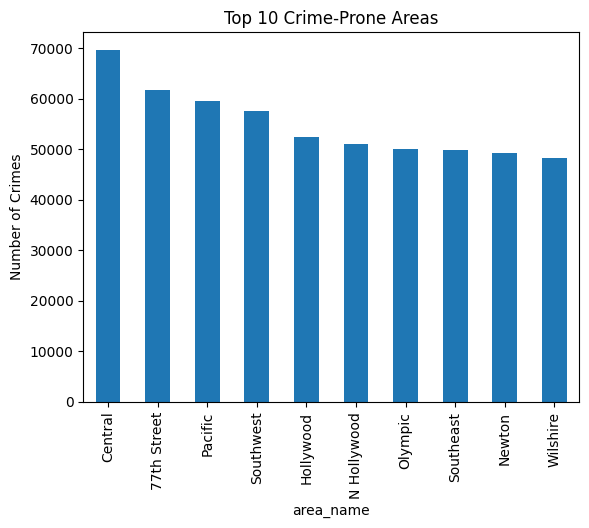

In [ ]:
# Top 10 crime-prone areas
top_areas= df['area_name'].value_counts().head(10)
top_areas.plot(kind='bar',title="Top 10 Crime-Prone Areas")
plt.ylabel("Number of Crimes")
plt.show()


In [ ]:
# Map of crimes (sampled for speed)
sample= df[['latitude','longitude']].dropna().sample(1000)
fig= px.scatter_mapbox(sample,lat='latitude',lon='longitude',
                        zoom=9,height=800,
                        mapbox_style="carto-positron",
                        title="Crime Location Map")
fig.show()

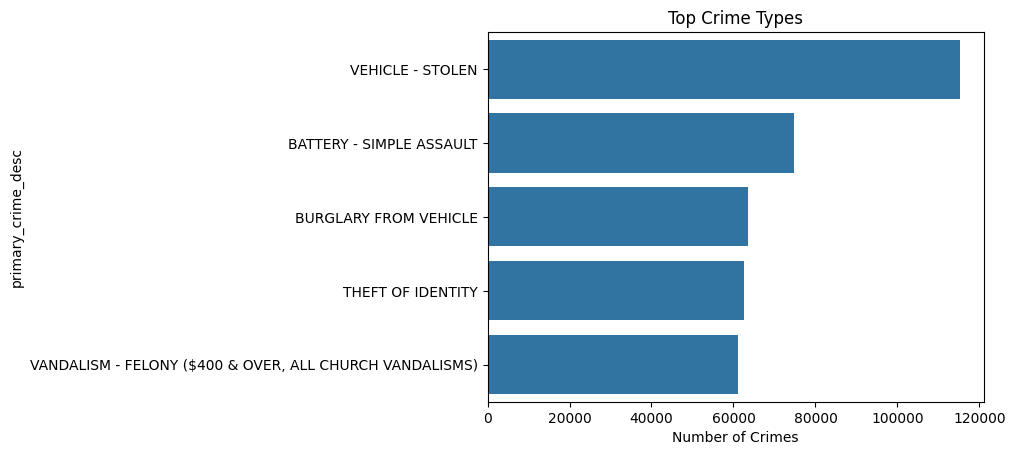

In [ ]:
# Top crime types
crime_type= df['primary_crime_desc'].value_counts().head()
sns.barplot(x=crime_type.values,y=crime_type.index)
plt.title("Top Crime Types")
plt.xlabel("Number of Crimes")
plt.show()





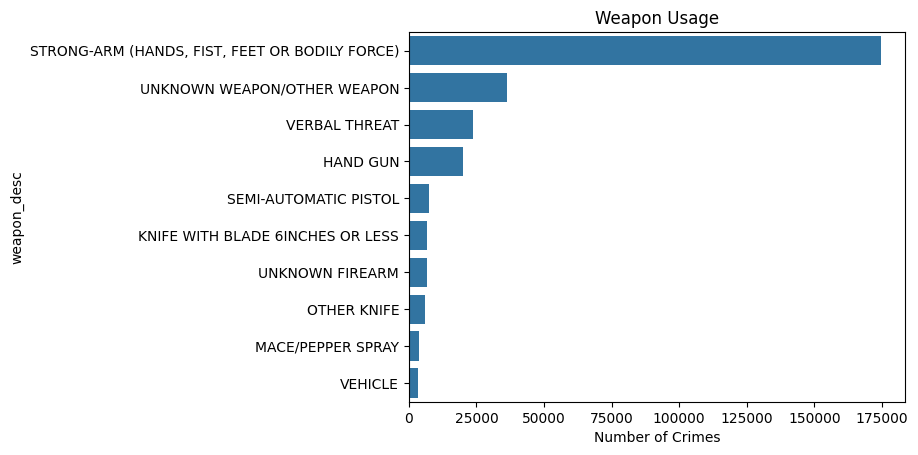

In [ ]:
# Weapon usage
weapon_usage=df['weapon_desc'].value_counts().head(10)
sns.barplot(x=weapon_usage.values,y=weapon_usage.index)
plt.title("Weapon Usage")
plt.xlabel("Number of Crimes")
plt.show()

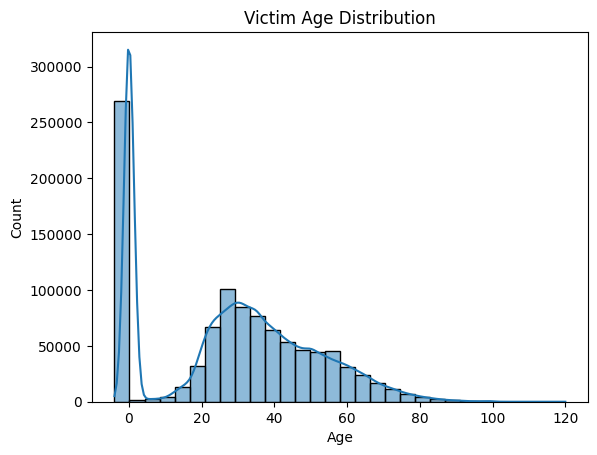

In [ ]:
# Victim age distribution
sns.histplot(df['victim_age'],bins=30,kde=True)
plt.title("Victim Age Distribution")
plt.xlabel("Age")
plt.show()

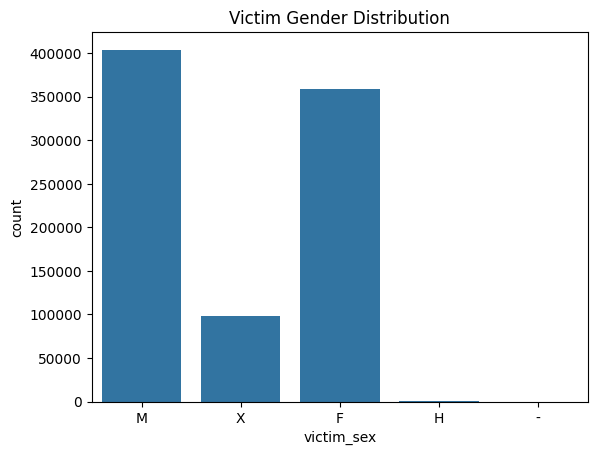

In [ ]:
# Gender distribution
sns.countplot(x='victim_sex',data=df)
plt.title("Victim Gender Distribution")
plt.show()

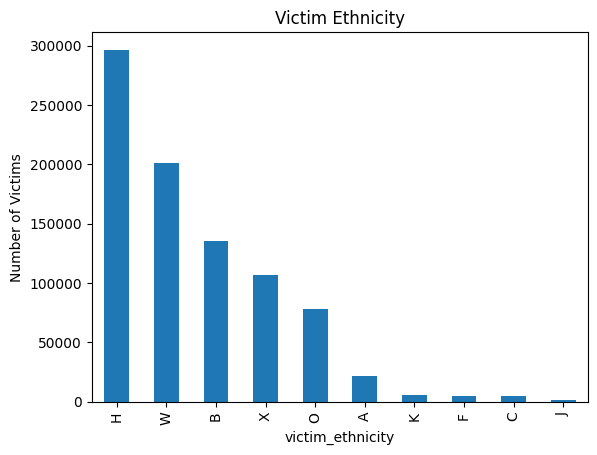

In [ ]:
# Victim descent (top 10)
df['victim_ethnicity'].value_counts().head(10).plot(kind='bar', title="Victim Ethnicity")
plt.ylabel("Number of Victims")
plt.show()

<ipython-input-36-1185990af9e4>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




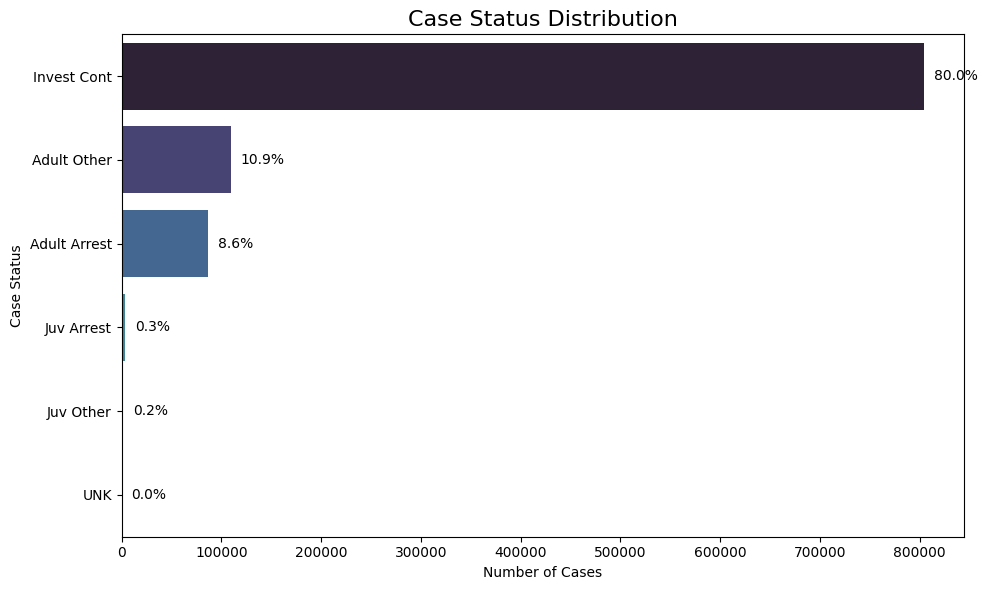

In [ ]:

# Get case status counts and percentages
case_counts=df['case_status_desc'].value_counts()
total=case_counts.sum()
percentages=(case_counts/total*100).round(1)
plt.figure(figsize=(10,6))
ax=sns.barplot(x=case_counts.values,y=case_counts.index,palette="mako")
for i,(count,pct) in enumerate(zip(case_counts.values,percentages)):
    ax.text(count+total*0.01,i,f"{pct}%",va='center',fontsize=10)
plt.title("Case Status Distribution",fontsize=16)
plt.xlabel("Number of Cases")
plt.ylabel("Case Status")
plt.tight_layout()
plt.show()

# **Preprocessing**

In [ ]:
# Drop columns with excessive missing values
df1=df.drop(columns=['crime_code_3', 'crime_code_4', 'weapon_code', 'weapon_desc', 'cross_street'], inplace=True)


In [ ]:
# Fill with 'Unknown' where applicable
df['victim_sex'].fillna('Unknown', inplace=True)
df['victim_ethnicity'].fillna('Unknown', inplace=True)
df['premise_desc'].fillna('Unknown', inplace=True)
df['modus_operandi'].fillna('None', inplace=True)

# Drop any row where case_status is missing
df.dropna(subset=['case_status'], inplace=True)



<ipython-input-57-071e3df187ed>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-57-071e3df187ed>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

# **Model Implimentation**

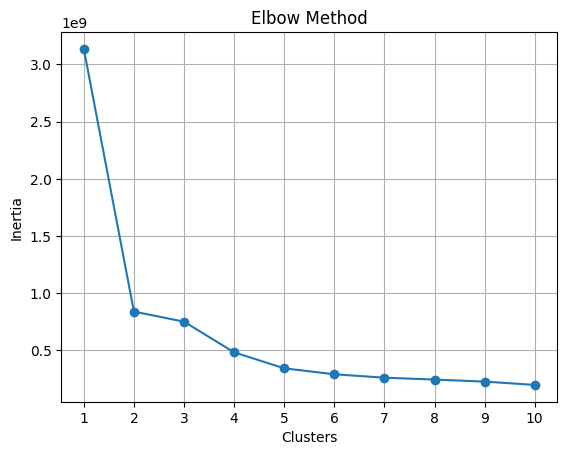

In [ ]:

features=df[['hour','victim_age','area_name','primary_crime_desc']].dropna()

le1=LabelEncoder()
le2=LabelEncoder()
features['area_name']=le1.fit_transform(features['area_name'])
features['primary_crime_desc']=le2.fit_transform(features['primary_crime_desc'])

inertia=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(features)
    inertia.append(km.inertia_)

plt.plot(range(1,11),inertia,'-o')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.xticks(range(1,11))
plt.grid(True)
plt.show()


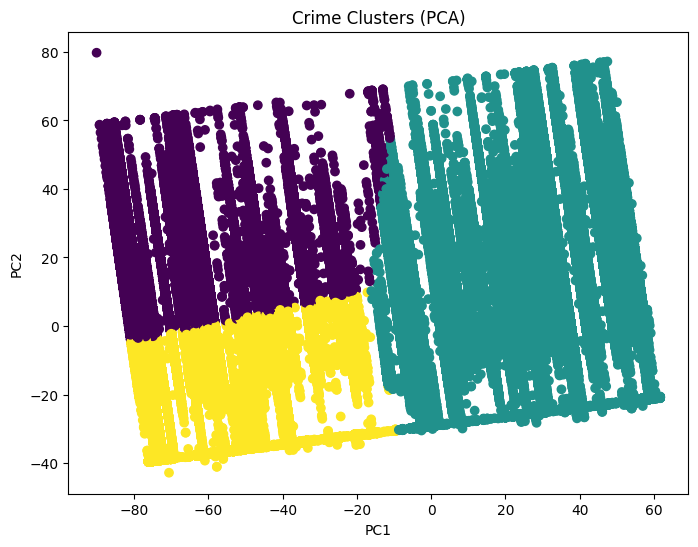

In [ ]:

features=df[['hour','victim_age','area_name','primary_crime_desc']].dropna()

le1=LabelEncoder()
le2=LabelEncoder()
features['area_name']=le1.fit_transform(features['area_name'])
features['primary_crime_desc']=le2.fit_transform(features['primary_crime_desc'])

kmeans=KMeans(n_clusters=3,random_state=42)
features['cluster']=kmeans.fit_predict(features)

pca=PCA(n_components=2)
comp=pca.fit_transform(features[['hour','victim_age','area_name','primary_crime_desc']])

plt.figure(figsize=(8,6))
plt.scatter(comp[:,0],comp[:,1],c=features['cluster'],cmap='viridis')
plt.title("Crime Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
